In [41]:
import yfinance as yf
import pandas as pd

# the biggest 10 stocks by market cap in 2000
# 1	Microsoft	United States	Software industry	Increase586,197
# 2	General Electric	United States	Conglomerate	Increase474,956
# 3	NTT Docomo	Japan	Telecommunications	Increase366,204
# 4	Cisco Systems	United States	Networking hardware	Increase348,965
# 5	Walmart	United States	Retail	Increase286,153
# 6	Intel	United States	Computer hardware	Increase277,096
# 7	Nippon Telegraph & Telephone	Japan	Telecommunications	Increase274,905
# 8	ExxonMobil	United States	Oil and gas	Increase265,894
# 9	Lucent	United States	Telecommunications	Increase237,668
# 10	Deutsche Telekom	Germany	Telecommunications	Increase209,628
STOCKS = ["MSFT", "GE", "CSCO", "WMT", "INTC", "NTTYY", "XOM", "DTEGY"]

data = yf.download(STOCKS, start="2000-01-01", end="2022-12-31")
data.head()


[*********************100%***********************]  8 of 8 completed


Adj Close                                                          \
                 CSCO      DTEGY          GE       INTC       MSFT      NTTYY   
Date                                                                            
1999-12-31  38.389641  27.574194  218.435623  24.572815  36.614166  39.850212   
2000-01-03  38.725605  27.841196  211.730804  25.972183  36.555382  40.110474   
2000-01-04  36.553013  26.020723  203.261673  24.759394  35.320534  39.329662   
2000-01-05  36.441044  26.312000  202.908813  24.964643  35.692944  38.028316   
2000-01-06  35.836304  24.491520  205.621536  23.509306  34.497303  36.900486   

                                     Close           ...     Open            \
                  WMT        XOM      CSCO    DTEGY  ...      WMT       XOM   
Date                                                 ...                      
1999-12-31  45.923298  19.838703  53.56250  71.0000  ...  68.3125  40.28125   
2000-01-03  44.387001  19.284641  54.03125  71.6875  ...  68.3750  39.75000   
2000-01-04  42.726101  18.915264  51.00000  67.0000  ...  65.5000  38.68750   
2000-01-05  41.854149  19.946442  50.84375  67.7500  ...  63.8750  39.00000   
2000-01-06  42.310894  20.977627  50.00000  63.0625  ...  63.0000  40.31250   

              Volume                                                        \
                CSCO   DTEGY       GE      INTC      MSFT   NTTYY      WMT   
Date                                                                         
1999-12-31  10726400   33900   764907  11572000  12517600  125400  2112700   
2000-01-03  53076000  218100  2869074  57710200  53228400  232600  8369900   
2000-01-04  50805600  134800  2875782  51019600  54119000  214800  6745100   
2000-01-05  68524000  388900  3548064  52389000  64059600  250000  7018700   
2000-01-06  48242600  134100  2583516  55171200  54976600  167800  6544500   

                      
                 XOM  
Date                  
1999-12-31   2758600  
2000-01-03  13458200  
2000-01-04  14510800  
2000-01-05  17485000  
2000-01-06  19461600  

[5 rows x 48 columns]

In [42]:
closes = data["Adj Close"]
closes.head()
closes.tail()

,CSCO,DTEGY,GE,INTC,MSFT,NTTYY,WMT,XOM
Date,,,,,,,,
2022-09-19,43.299999,19.209999,67.050003,29.440001,244.520004,26.959999,134.330002,93.199997
2022-09-20,42.580002,18.719999,66.589996,28.959999,242.449997,27.170000,133.550003,92.440002
2022-09-21,41.590000,18.309999,65.220001,28.469999,238.949997,26.780001,134.770004,90.949997
2022-09-22,41.150002,18.410000,65.360001,28.070000,240.979996,27.049999,133.389999,90.570000
2022-09-23,40.700001,17.825001,64.550003,27.500099,238.039993,26.813999,130.119995,85.699997


# check what would have happened with equal weights

<AxesSubplot:xlabel='Date'>

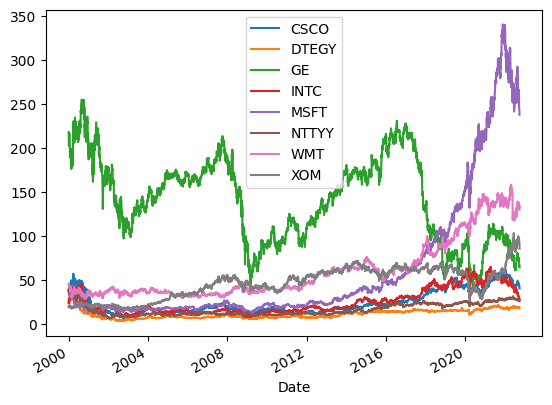

In [58]:
closes.plot()

In [43]:
startMoney = 10000
nrStocks = startMoney / closes.iloc[0]
win = nrStocks * closes.iloc[-1]
totalWin = win.sum()
print("total win is: ", totalWin)
win

total win is:  174486.9401635783


CSCO     10601.818591
DTEGY     6464.377814
GE        2955.104214
INTC     11191.269396
MSFT     65013.085809
NTTYY     6728.696728
WMT      28334.200965
XOM      43198.386647
dtype: float64

In [56]:
# pyportfolio opt
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Calculate expected returns and sample covariance

def getWeights(closes: pd.DataFrame):
    mu = expected_returns.mean_historical_return(closes)
    S = risk_models.sample_cov(closes)

    # Optimize for maximal Sharpe ratio
    
    try:
        ef = EfficientFrontier(mu, S)
        weights = ef.max_sharpe()
    except Exception:
        ef = EfficientFrontier(mu, S)
        weights = ef.min_volatility()
    return weights
# ef.portfolio_performance(verbose=True)

In [72]:
# optimize every year
from datetime import datetime


bestWin = -9999
bestLookback = -1

for lookback in [1,2,3,4,5,6,7,8,10,15,20]:
    startMoney = 10000
    money = startMoney
    stocks = dict()
    for x in STOCKS:
        stocks[x] = 0.

    portfolioTotalWorth = []
    for year in range(2000, 2022):
        start = datetime(year - lookback, 1, 1)
        end = datetime(year, 12, 31)
        subcloses = closes[start:end]
        subcloses = subcloses.fillna(method="bfill")
        if len(subcloses) == 0:
            print("skipping year", year)
            continue # wtf?!
        
        weights = getWeights(subcloses)
        # first "sell"
        for stock in STOCKS:
            # "sell"
            crntPrice = subcloses[stock][-1]
            money += crntPrice * stocks[stock]
            stocks[stock] = 0.
        # add this to total portfolio worth
        portfolioTotalWorth.append(money)
        # print(year, money)
        
        # then buy according to new weights
        for stock in STOCKS:
            crntPrice = subcloses[stock][-1]
            moneyPerStock = money * weights[stock]
            howMany = moneyPerStock / crntPrice
            money -= howMany * crntPrice
            stocks[stock] = howMany
    # endmoney
    endMoney = portfolioTotalWorth[-1]
    if endMoney > bestWin:
        bestWin = endMoney
        bestLookback = lookback
print("best lookback %d with a win of: %.2f $. better than baseline? %s" % (bestLookback, bestWin, str(bestWin > 174000)))
# 174 k is baseline
        
    
    

best lookback 5 with a win of: 126447.00 $. better than baseline? False


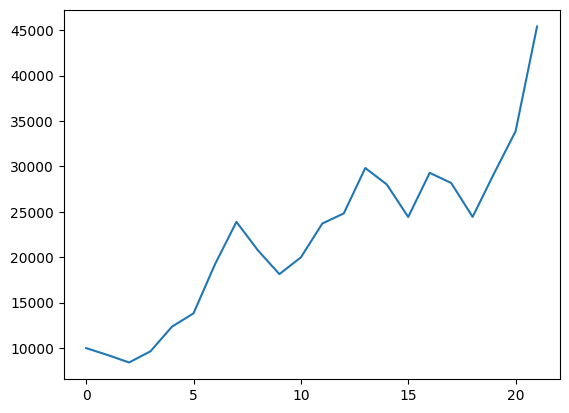

In [73]:
import matplotlib.pyplot as plt

plt.plot(portfolioTotalWorth)